In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData(datadir = "/data_nls/")

In [3]:
src_dir = "/run_7_14_23_old/"
analyzer.collect_data(src_dir)

## Basic statistics

In [4]:
df = analyzer.get_data()

In [5]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,400.0,-0.0,-2113.253215,-2113.253215,260.204216,-4.143037,5.008291,0.097500,0.0,...,1,8,8,2,67.642711,-18.322493,0.467254,0.273175,0.013773,0.003731
1,100,400.0,0.0,-2143.428607,-2143.428607,270.043036,-4.143037,5.008291,0.086510,2.0,...,1,8,8,2,68.909695,-18.665683,0.467254,0.273175,0.013520,0.003662
2,200,400.0,-0.0,-2169.985492,-2169.985492,108.059868,-4.143037,5.008291,0.086182,3.0,...,1,8,8,2,43.590922,-11.807545,0.467254,0.273175,0.021372,0.005789
3,300,400.0,0.0,-2122.275140,-2122.275140,299.846164,-4.143037,5.008291,0.085864,5.0,...,1,8,8,2,72.612784,-19.668745,0.467254,0.273175,0.012830,0.003475
4,400,400.0,0.0,-2160.991167,-2160.991167,311.752183,-4.143037,5.008291,0.086378,7.0,...,1,8,8,2,74.040372,-20.055438,0.467254,0.273175,0.012583,0.003408


In [6]:
df["itheta"].unique()

array([0.785398, 1.570796, 2.356194, 3.141593, 0.      ])

In [7]:
df_stats = analyzer.do_stats(therm = 0)

In [8]:
df_stats.head()

|phi|_mean  Q_L_mean    A_L_mean  \
length itheta   beta nMC     ntherm                                     
10.0   0.000000 1.6  10000.0 1000.0       100.0   0.00000 -537.575236   
       0.785398 1.6  10000.0 1000.0       100.0   0.00000 -536.245763   
       1.570796 1.6  10000.0 1000.0       100.0   0.00000 -534.924305   
       2.356194 1.6  10000.0 1000.0       100.0   0.00000 -536.380039   
       3.141593 1.6  10000.0 1000.0       100.0   0.35982 -532.304424   

                                       S_L_mean  Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                      
10.0   0.000000 1.6  10000.0 1000.0 -537.575236  67.389943    1.692555   
       0.785398 1.6  10000.0 1000.0 -536.245763  69.730522   -0.033079   
       1.570796 1.6  10000.0 1000.0 -534.924305  70.511411    0.294422   
       2.356194 1.6  10000.0 1000.0 -536.380039  70.444567    3.686687   
       3.141593 1.6  10000.0 1000.0 -533.434833  64.865895   -3.958056   

                                     F_LIm_mean  acc_mean  freq_mean  Q_L_ta  \
length itheta   beta nMC     ntherm                                            
10.0   0.000000 1.6  10000.0 1000.0   -3.112338  0.085682      100.0     1.0   
       0.785398 1.6  10000.0 1000.0    1.477292  0.085499      100.0     1.0   
       1.570796 1.6  10000.0 1000.0    0.215351  0.084884      100.0     1.0   
       2.356194 1.6  10000.0 1000.0   -6.083216  0.086166      100.0     1.0   
       3.141593 1.6  10000.0 1000.0   -3.912962  0.085829      100.0     1.0   

                                     ...  freq_std  corr_length_Re_std  \
length itheta   beta nMC     ntherm  ...                                 
10.0   0.000000 1.6  10000.0 1000.0  ...       0.0            2.959807   
       0.785398 1.6  10000.0 1000.0  ...       0.0            2.235355   
       1.570796 1.6  10000.0 1000.0  ...       0.0            1.424884   
       2.356194 1.6  10000.0 1000.0  ...       0.0            1.390415   
       3.141593 1.6  10000.0 1000.0  ...       0.0            1.961791   

                                     corr_length_Im_std  F_Re_py_std  \
length itheta   beta nMC     ntherm                                    
10.0   0.000000 1.6  10000.0 1000.0            1.999546          0.0   
       0.785398 1.6  10000.0 1000.0            0.749371          0.0   
       1.570796 1.6  10000.0 1000.0            0.588279          0.0   
       2.356194 1.6  10000.0 1000.0            0.433872          0.0   
       3.141593 1.6  10000.0 1000.0            2.204512          0.0   

                                     F_Im_py_std  mass_gap_Re_std  \
length itheta   beta nMC     ntherm                                 
10.0   0.000000 1.6  10000.0 1000.0          0.0         0.009025   
       0.785398 1.6  10000.0 1000.0          0.0         0.005074   
       1.570796 1.6  10000.0 1000.0          0.0         0.004782   
       2.356194 1.6  10000.0 1000.0          0.0         0.009117   
       3.141593 1.6  10000.0 1000.0          0.0         0.026151   

                                     mass_gap_Im_std  time (sec)  time (min)  \
length itheta   beta nMC     ntherm                                            
10.0   0.000000 1.6  10000.0 1000.0         0.007999        32.0    0.533333   
       0.785398 1.6  10000.0 1000.0         0.001701        34.0    0.566667   
       1.570796 1.6  10000.0 1000.0         0.001974        24.0    0.400000   
       2.356194 1.6  10000.0 1000.0         0.002845        24.0    0.400000   
       3.141593 1.6  10000.0 1000.0         0.038354        26.0    0.433333   

                                     time (hr)  
length itheta   beta nMC     ntherm             
10.0   0.000000 1.6  10000.0 1000.0   0.008889  
       0.785398 1.6  10000.0 1000.0   0.009444  
       1.570796 1.6  10000.0 1000.0   0.006667  
       2.356194 1.6  10000.0 1000.0   0.006667  
       3.141593 1.6  10000.0 1000.0   0.007222  

[5 rows x 37 columns]

# Observable plots

In [9]:
beta = 1.6
nMC = 10000
plot_params = {"beta": beta, "nMC": nMC}

In [10]:
df_stats = analyzer.do_stats(therm = 0.4, **plot_params)

In [11]:
df_stats.columns

Index(['|phi|_mean', 'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean',
       'F_LRe_mean', 'F_LIm_mean', 'acc_mean', 'freq_mean', 'Q_L_ta', 'A_L_ta',
       'S_L_ta', 'Xi_L_ta', 'corr_length_Re_mean', 'corr_length_Im_mean',
       'F_Re_py_mean', 'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean',
       '|phi|_std', 'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std',
       'F_LIm_std', 'acc_std', 'freq_std', 'corr_length_Re_std',
       'corr_length_Im_std', 'F_Re_py_std', 'F_Im_py_std', 'mass_gap_Re_std',
       'mass_gap_Im_std', 'time (sec)', 'time (min)', 'time (hr)'],
      dtype='object')

### Q_L

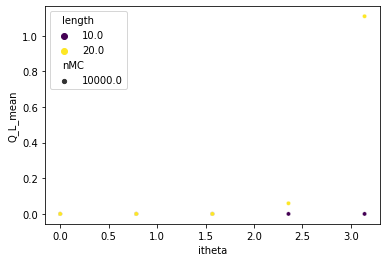

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

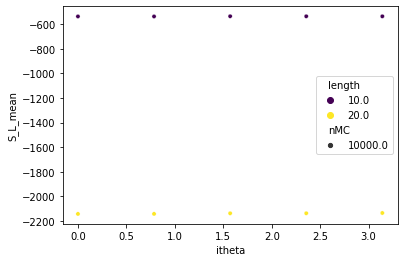

In [13]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

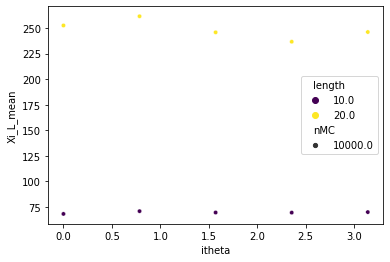

In [14]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

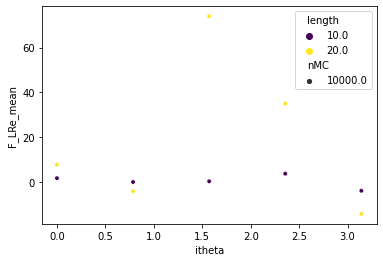

In [15]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [16]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
length itheta   beta nMC     ntherm Source          
10.0   0.000000 1.6  10000.0 1000.0 C++    -3.112338
                                    Python -0.189068
       0.785398 1.6  10000.0 1000.0 C++     1.477292
                                    Python  0.198780
       1.570796 1.6  10000.0 1000.0 C++     0.215351

In [17]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [18]:
F_L_df.head()

F_L_Re    F_L_Im
length itheta   beta nMC     ntherm Source                    
10.0   0.000000 1.6  10000.0 1000.0 C++     1.692555 -3.112338
                                    Python  0.373933 -0.189068
       0.785398 1.6  10000.0 1000.0 C++    -0.033079  1.477292
                                    Python  0.263159  0.198780
       1.570796 1.6  10000.0 1000.0 C++     0.294422  0.215351

In [19]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Re", hue = "length", 
                style = "Source", palette = sns.color_palette("Blues", 3))
plt.show()

ValueError: The palette list has the wrong number of colors.

In [ ]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Im", hue = "length", 
                style = "Source", palette = sns.color_palette("Reds", 3))
plt.show()

## Correlation Length

In [ ]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

In [ ]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()